In [1]:
%load_ext autoreload
%autoreload 2
!hostname
!pwd
import os, sys
print(sys.executable)
os.environ['CUDA_VISIBLE_DEVICES'] = "5"
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'

fish-gcp005
/home/akarshkumar0101/nca-alife/src
/home/akarshkumar0101/miniconda3/envs/nca-alife-jax/bin/python


In [2]:
import os, sys, glob, pickle
from functools import partial

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from tqdm.auto import tqdm
from einops import rearrange, reduce, repeat

In [3]:
import experiment_utils
import util

# Create Experiment

In [4]:
! rm -rf ./experiments
! mkdir -p ./experiments

In [ ]:
group.add_argument("--seed", type=int, default=0)
group.add_argument("--save_dir", type=str, default=None)

group = parser.add_argument_group("model")
group.add_argument("--grid_size", type=int, default=64)
group.add_argument("--d_state", type=int, default=16)
group.add_argument("--n_groups", type=int, default=1)
group.add_argument("--rollout_steps", type=int, default=512)

group = parser.add_argument_group("data")
group.add_argument("--prompts", type=str, default="an artificial cell,a bacterium")
group.add_argument("--clip_model", type=str, default="clip-vit-base-patch32") # clip-vit-base-patch32 or clip-vit-large-patch14

group = parser.add_argument_group("optimization")
group.add_argument("--bs", type=int, default=4)
group.add_argument("--pop_size", type=int, default=16)
group.add_argument("--n_iters", type=int, default=10000)
group.add_argument("--sigma", type=float, default=1.)

In [7]:
cfg_default = dict(
    seed=0, save_dir=None,
    grid_size=64, d_state=16, n_groups=1, rollout_steps=512,

    prompts="", clip_model="clip-vit-base-patch32",
    
    bs=4, pop_size=16, n_iters=10000, sigma=1.
)

prompts_sweep = [
    "a bacteria under the microscope",
    "a biological cell",
    "a diverse ecosystem of cells moving around",
    "the game of life cellular automaton",
    "an egg",
    "the yellow sun",
    "a fat cat",
    "an apple",
]
sigma_sweep = [1., 0.1, 0.01]

cfgs = []

seed = 0
for i1, prompts in enumerate(prompts_sweep):
    for sigma in sigma_sweep:
        cfg = cfg_default.copy()
        cfg.update(seed=seed, prompts=prompts, sigma=sigma)
        cfg.update(save_dir=f"/home/akarshkumar0101/nca-alife-data/dnca_0/{seed}_{i1}_{sigma}")
        
        cfg.update(n_iters=5000)
        cfgs.append(cfg)

# print(cfgs)
print(len(cfgs))

24


In [8]:
commands = experiment_utils.create_commands(cfgs, prefix='python train_target_emergence_dnca.py', out_file='./experiments/main.sh')
print('\n'.join(commands[:3]), '\n...')
print(len(commands), 'commands')

python train_target_emergence_dnca.py --seed=0 --save_dir="/home/akarshkumar0101/nca-alife-data/dnca_0/0_0_1.0"  --grid_size=64 --d_state=16 --n_groups=1 --rollout_steps=512 --prompts="a bacteria under the microscope"            --clip_model="clip-vit-base-patch32" --bs=4 --pop_size=16 --n_iters=5000 --sigma=1.0 
python train_target_emergence_dnca.py --seed=0 --save_dir="/home/akarshkumar0101/nca-alife-data/dnca_0/0_0_0.1"  --grid_size=64 --d_state=16 --n_groups=1 --rollout_steps=512 --prompts="a bacteria under the microscope"            --clip_model="clip-vit-base-patch32" --bs=4 --pop_size=16 --n_iters=5000 --sigma=0.1 
python train_target_emergence_dnca.py --seed=0 --save_dir="/home/akarshkumar0101/nca-alife-data/dnca_0/0_0_0.01" --grid_size=64 --d_state=16 --n_groups=1 --rollout_steps=512 --prompts="a bacteria under the microscope"            --clip_model="clip-vit-base-patch32" --bs=4 --pop_size=16 --n_iters=5000 --sigma=0.01 
...
24 commands


# Visualize Results

In [12]:
import jax
import jax.numpy as jnp
import copy

In [17]:
df = []
for cfg in tqdm(cfgs):
    save_dir = cfg['save_dir']
    dfi = copy.copy(cfg)

    _, loss = util.load_pkl(cfg['save_dir'], 'best')
    dfi['loss'] = loss.item()
    df.append(dfi)
df = pd.DataFrame(df)

  0%|          | 0/24 [00:00<?, ?it/s]

In [18]:
df

,seed,save_dir,grid_size,d_state,n_groups,rollout_steps,prompts,clip_model,bs,pop_size,n_iters,sigma,loss
0,0,/home/akarshkumar0101/nca-alife-data/dnca_0/0_...,64,16,1,512,a bacteria under the microscope,clip-vit-base-patch32,4,16,5000,1.00,-0.311686
1,0,/home/akarshkumar0101/nca-alife-data/dnca_0/0_...,64,16,1,512,a bacteria under the microscope,clip-vit-base-patch32,4,16,5000,0.10,-0.320048
2,0,/home/akarshkumar0101/nca-alife-data/dnca_0/0_...,64,16,1,512,a bacteria under the microscope,clip-vit-base-patch32,4,16,5000,0.01,-0.329925
3,0,/home/akarshkumar0101/nca-alife-data/dnca_0/0_...,64,16,1,512,a biological cell,clip-vit-base-patch32,4,16,5000,1.00,-0.315876
4,0,/home/akarshkumar0101/nca-alife-data/dnca_0/0_...,64,16,1,512,a biological cell,clip-vit-base-patch32,4,16,5000,0.10,-0.318485
5,0,/home/akarshkumar0101/nca-alife-data/dnca_0/0_...,64,16,1,512,a biological cell,clip-vit-base-patch32,4,16,5000,0.01,-0.304551
6,0,/home/akarshkumar0101/nca-alife-data/dnca_0/0_...,64,16,1,512,a diverse ecosystem of cells moving around,clip-vit-base-patch32,4,16,5000,1.00,-0.306644
7,0,/home/akarshkumar0101/nca-alife-data/dnca_0/0_...,64,16,1,512,a diverse ecosystem of cells moving around,clip-vit-base-patch32,4,16,5000,0.10,-0.306984
8,0,/home/akarshkumar0101/nca-alife-data/dnca_0/0_...,64,16,1,512,a diverse ecosystem of cells moving around,clip-vit-base-patch32,4,16,5000,0.01,-0.311818
9,0,/home/akarshkumar0101/nca-alife-data/dnca_0/0_...,64,16,1,512,the game of life cellular automaton,clip-vit-base-patch32,4,16,5000,1.00,-0.372029


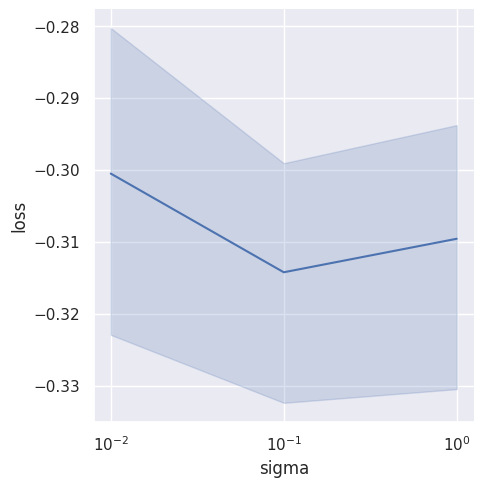

In [22]:
sns.relplot(data=df, x='sigma', y='loss', kind='line')
plt.xscale('log')

  0%|          | 0/8 [00:00<?, ?it/s]

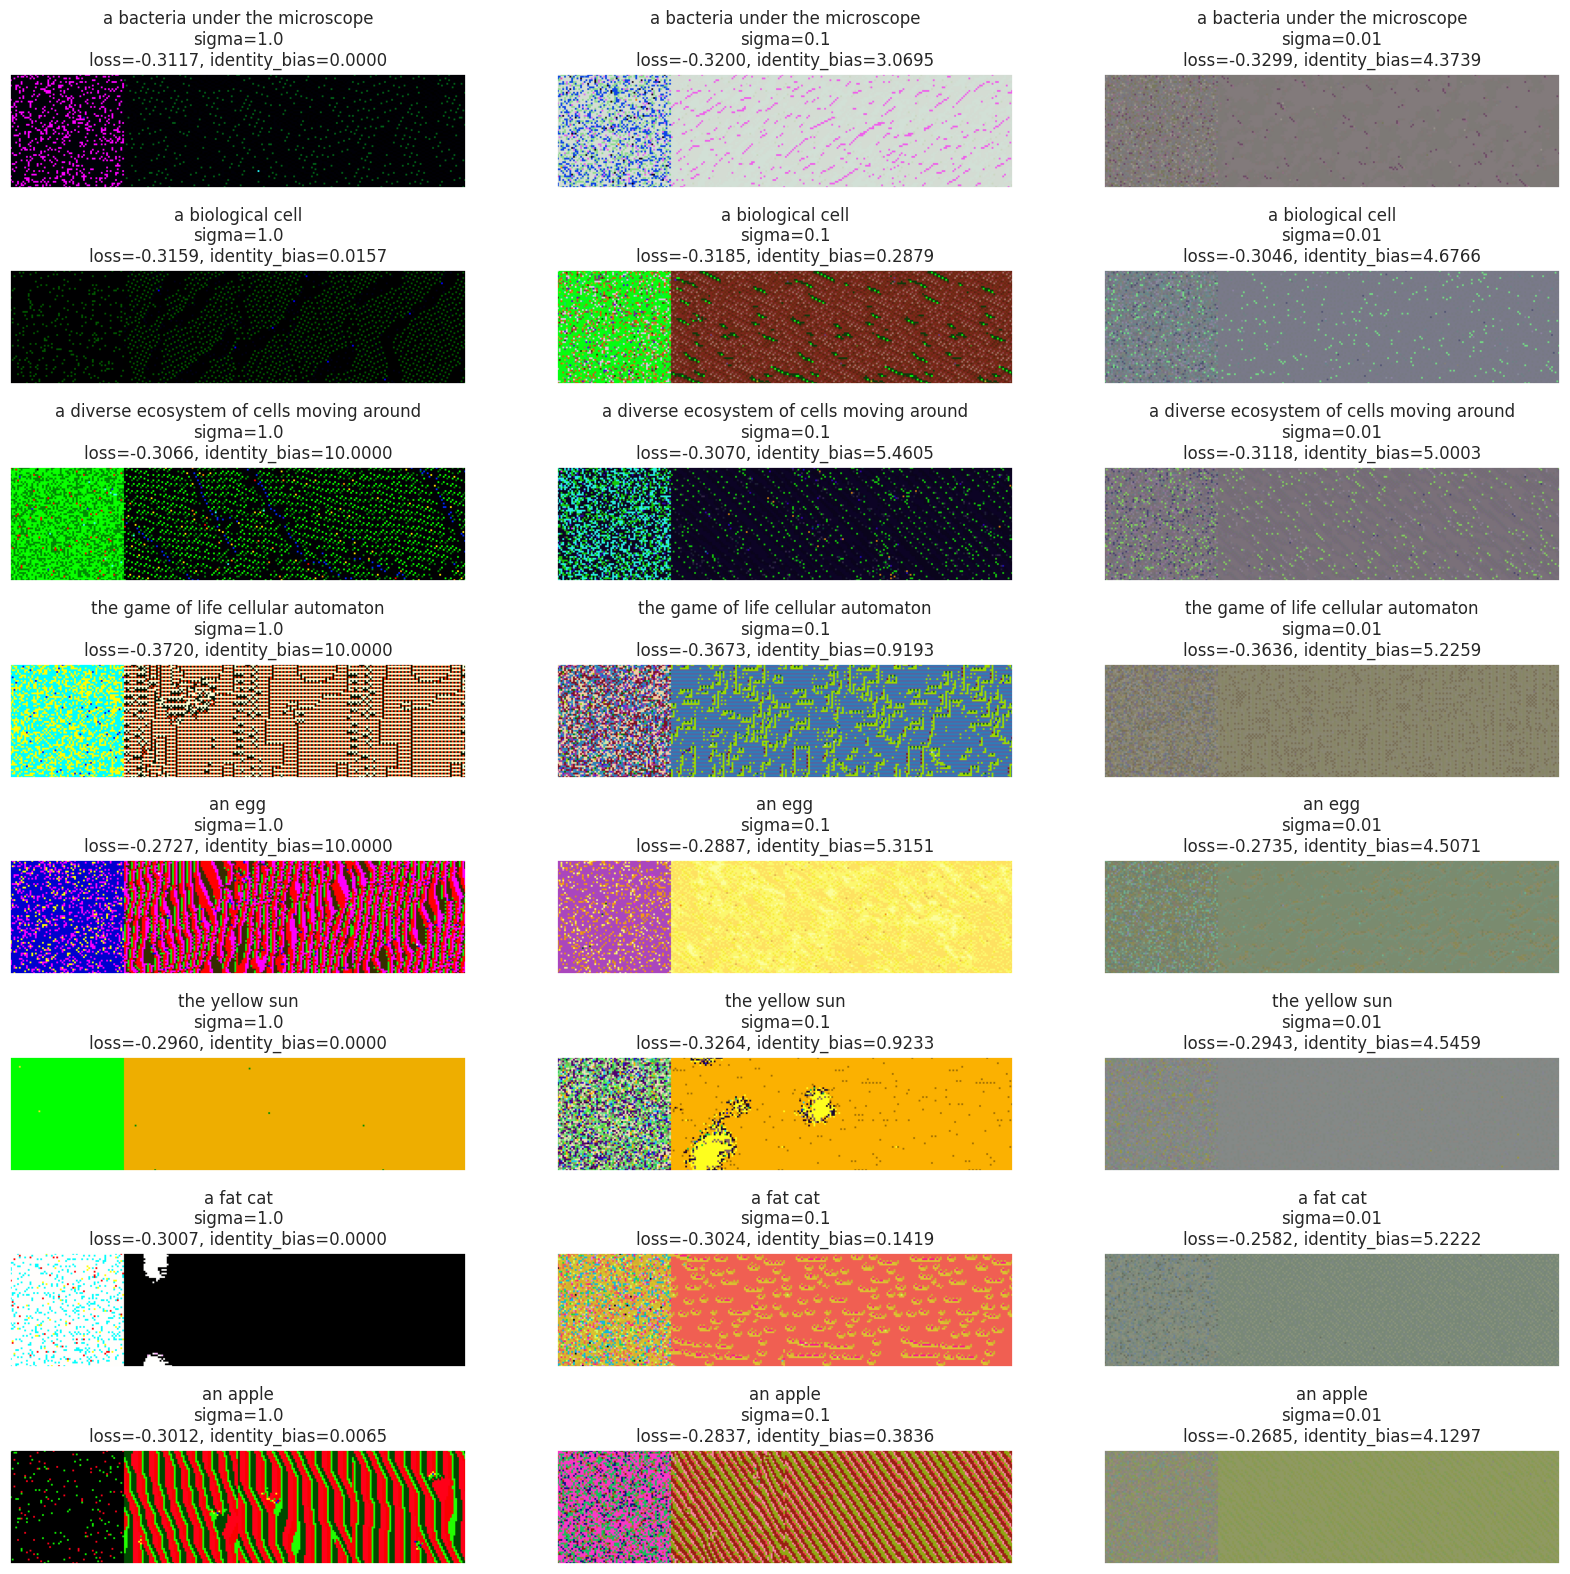

In [63]:
plt.figure(figsize=(20, 20))
iplt = 0
for i1, prompts in enumerate(tqdm(prompts_sweep)):
    for sigma in sigma_sweep:
        save_dir=f"/home/akarshkumar0101/nca-alife-data/dnca_0/{seed}_{i1}_{sigma}"
        vid = util.load_pkl(save_dir, 'vid').astype(np.uint8)

        params, loss = util.load_pkl(save_dir, 'best')
        loss = loss.item()
        identity_bias = jax.nn.sigmoid(params[-1]).item()*10
    
        iplt+=1
        plt.subplot(8, 3, iplt)
        # plt.imshow(vid[16])
        plt.imshow(rearrange(vid[::vid.shape[0]//4], "(R C) H W D -> (R H) (C W) D", R=1))
        plt.grid(False); plt.xticks([]); plt.yticks([])
        plt.title(f"{prompts}\n{sigma=}\n{loss=:.4f}, {identity_bias=:.4f}")
plt.show()
        

  0%|          | 0/8 [00:00<?, ?it/s]

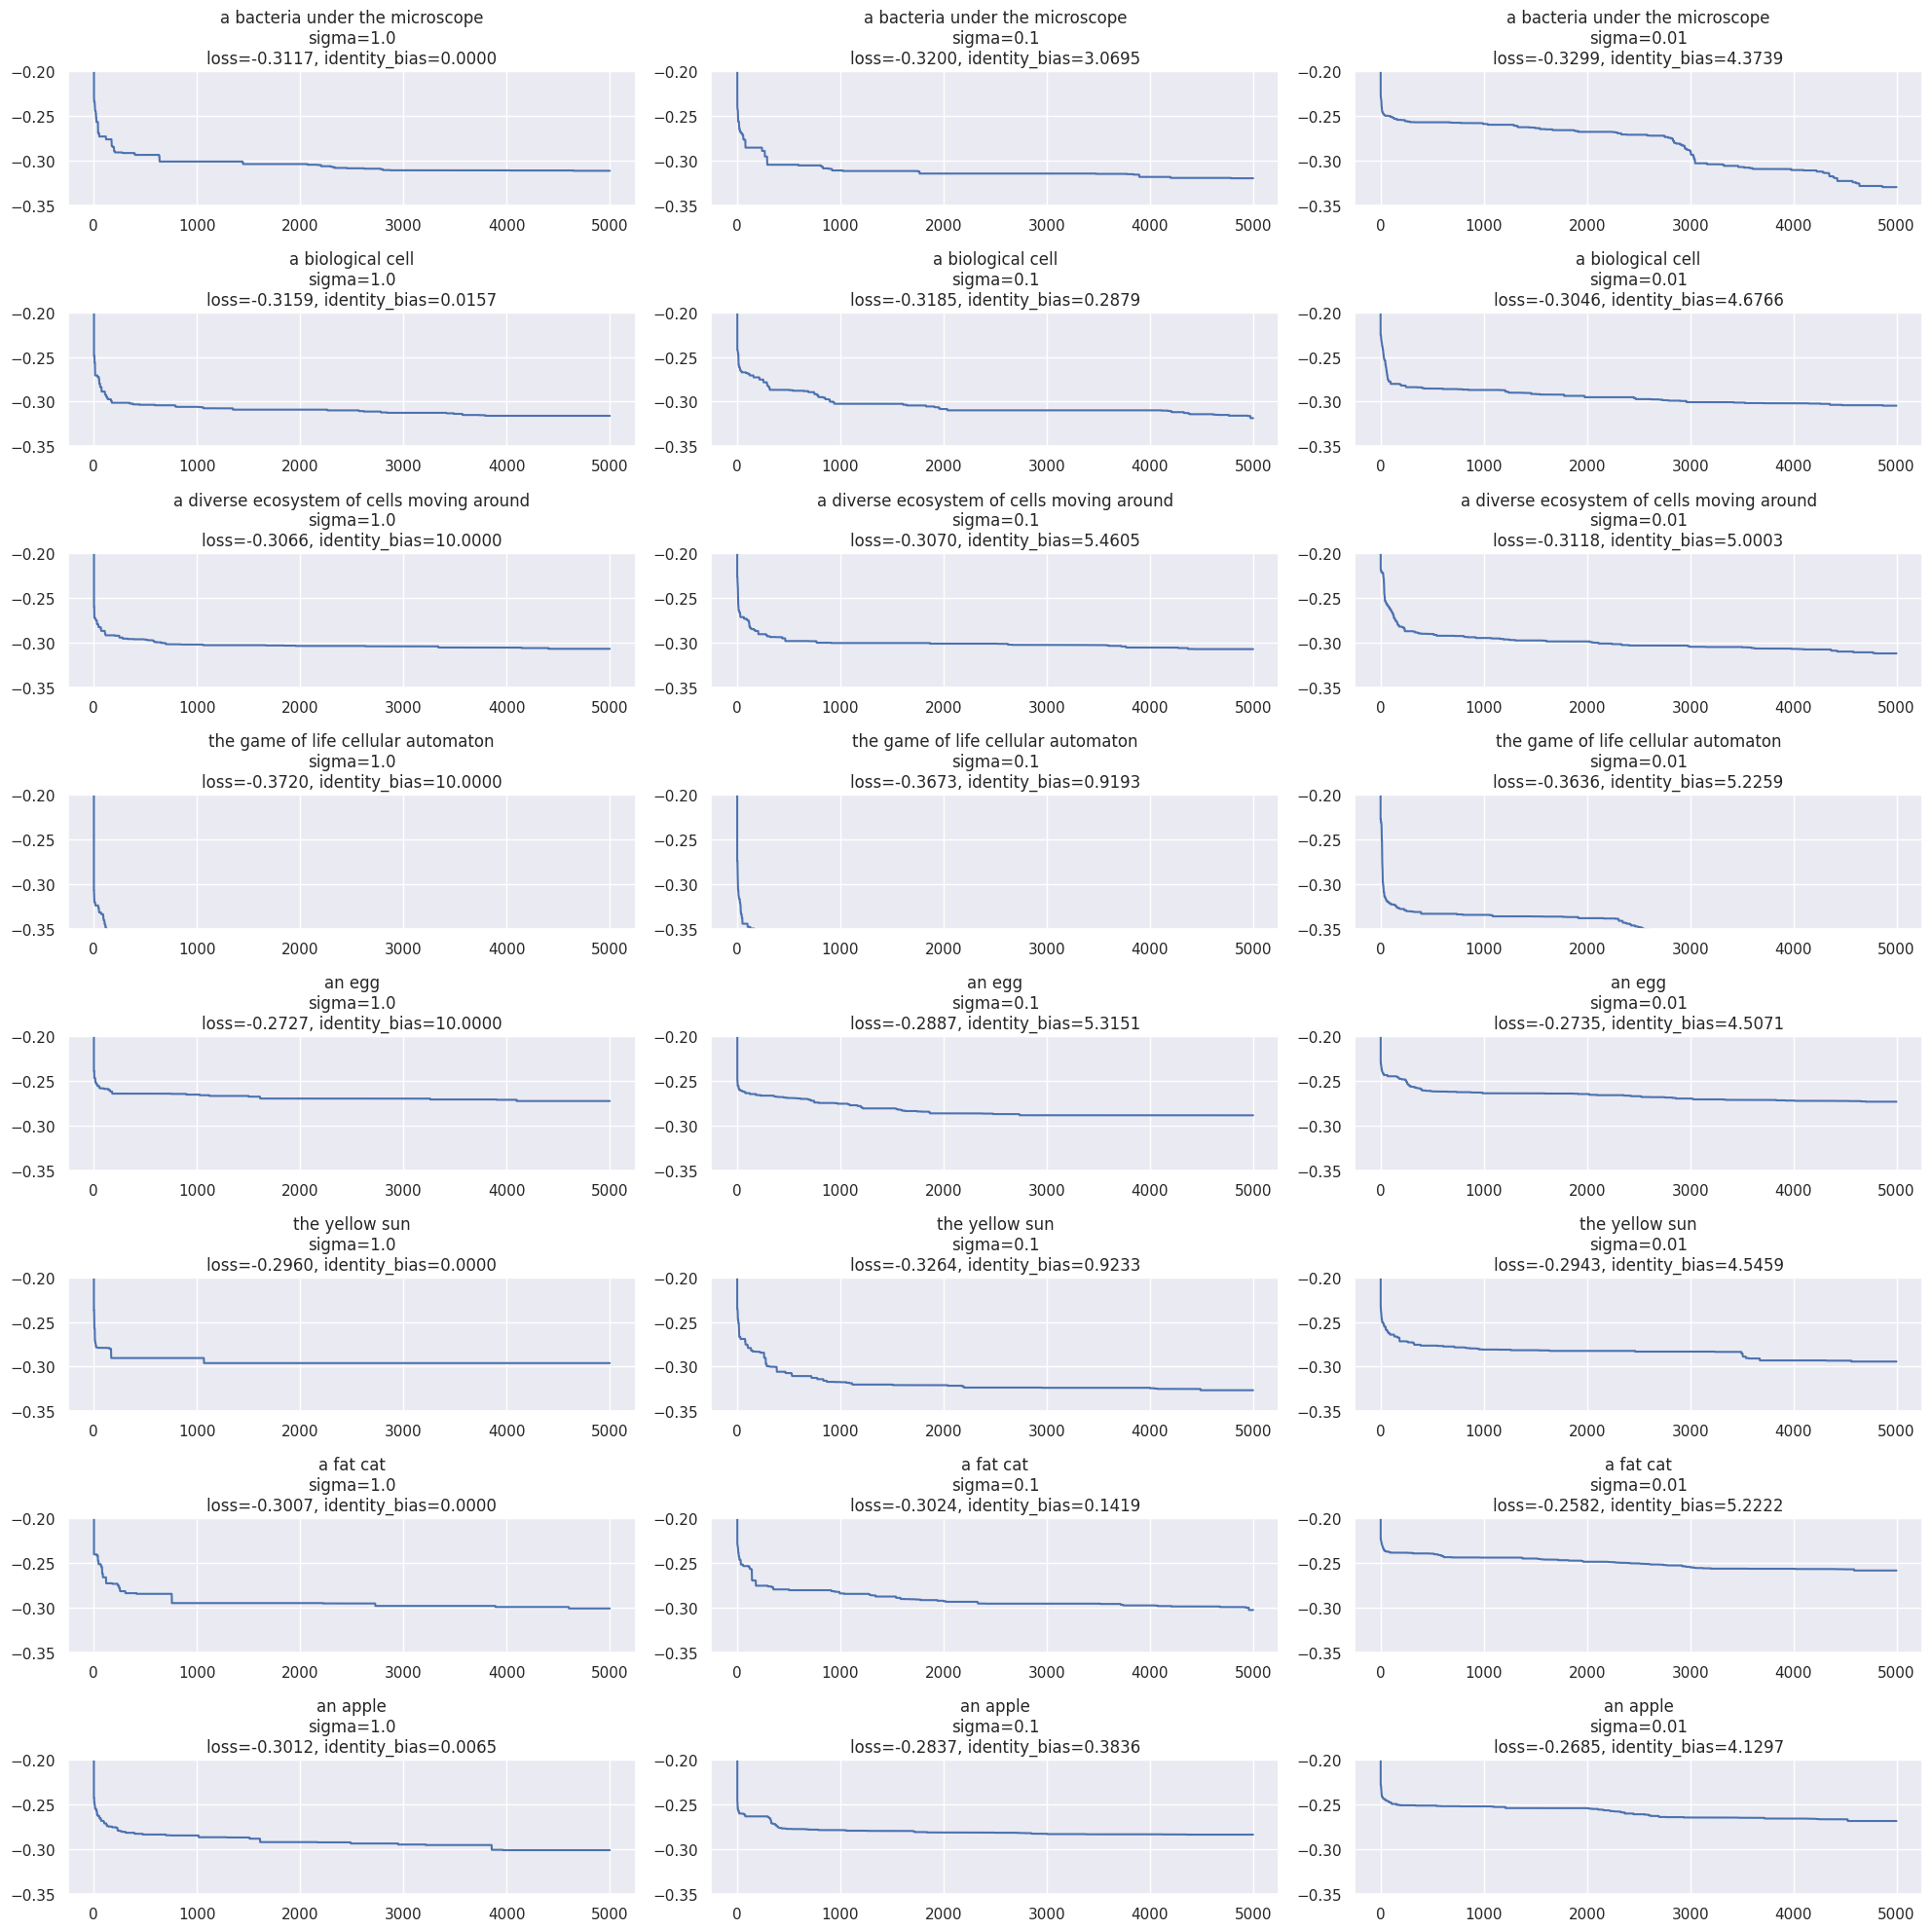

In [64]:
plt.figure(figsize=(20, 20))
iplt = 0
for i1, prompts in enumerate(tqdm(prompts_sweep)):
    for sigma in sigma_sweep:
        save_dir=f"/home/akarshkumar0101/nca-alife-data/dnca_0/{seed}_{i1}_{sigma}"
        # vid = util.load_pkl(save_dir, 'vid').astype(np.uint8)

        params, loss = util.load_pkl(save_dir, 'best')
        loss = loss.item()
        identity_bias = jax.nn.sigmoid(params[-1]).item()*10

        iplt+=1
        plt.subplot(8, 3, iplt)
        # plt.imshow(vid[16])
        data = util.load_pkl(save_dir, 'data')
        plt.plot(data['best_loss'])
        plt.ylim(-.35, -.2)
        plt.title(f"{prompts}\n{sigma=}\n{loss=:.4f}, {identity_bias=:.4f}")

plt.tight_layout()
plt.show()
        